## Important Info: Estimate the verification accuracy of DAC for project data
- Used DAC(RP projected) data to train an NN model
- There are 193 different user's profiles and each profiles has 1000 data samples (normalized data)
- Devide all profiles in two groups: training  profile (96) and auxilary profiles (96) 
- Each auxilary data semple has 65 different features and RP prjection moved them to 56 features
- Random matrix of RP follow following distributions: Pr(x=+1)= 1/2s; Pr(x=-1)= 1/2s, Pr(x=0)= 1-1/s where s=3
- The value of dimension reduction k is calculated by k= [(4+2\beta)/(\epsolon^2/2+\epsolon^3/2)]log (n) where n is total sample in a profile and \epsolon,\beta>0
- Construct a NN regressor has 4 dense layers along with 'BatchNormalization' and 'relu' activation funcation
- Last layer is sigmoid function. Input dimension of model is 65 and output dimension 56.
- Trained regressor to recover the plain data from the projected data for the 96 auxilary data classes
- This traind regressor will be used to recove the training data of classifer.
- Let say attacker has the access of RP data of original data and their corresponding label. Attacker can find it by model inversion attack

- Included a summary of the NN architecture
- Need shallow as RP make users profile more distinct
- For 10 rounds of training training accurach reached to 100.0% and validation accuracy reached to 100.0%
- Included a graph that shows change of training and validation acccruacy in different ephocs
- Test accruacy 100.0%

In [1]:
#Read all data [194 users' oversampled data]
import csv
import pandas as pd
dataset=pd.read_csv('Dataset/OversampledSwipeData.csv',index_col=0)
dataset.head()

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,Label
0,0.052478,0.277631,0.451259,0.718039,0.462785,0.0,0.0,0.018702,0.167556,-0.021220,...,-0.000286,0.006156,0.000038,0.098039,0.175416,0.183196,0.083857,0.007032,0.183644,0
1,0.052112,0.329417,0.456423,0.707689,0.431129,0.0,0.0,0.018824,0.188321,-0.046427,...,-0.001681,0.006563,0.000043,0.172549,0.161923,0.174437,0.012390,0.000154,0.172166,0
2,0.044798,0.246703,0.482247,0.682013,0.413386,0.0,0.0,0.023549,0.219466,-0.084152,...,-0.003980,0.007612,0.000058,0.172549,0.165296,0.176905,0.015824,0.000250,0.179818,0
3,0.050101,0.292016,0.470626,0.711022,0.418269,0.0,0.0,0.019350,0.182533,-0.089321,...,0.000438,0.009006,0.000081,0.149020,0.165296,0.178174,0.036672,0.001343,0.183644,0
4,0.048638,0.282665,0.438347,0.712347,0.447676,0.0,0.0,0.023968,0.151995,-0.024688,...,-0.001410,0.007316,0.000054,0.125490,0.175416,0.184353,0.061493,0.003786,0.183644,0


In [2]:
#replace the user ID by class name and count the number of sample in each class
#dataset['Label'] = pd.factorize(dataset['Label'])[0]
dataset.groupby(['Label'])['Label'].count()

Label
0     300
1     300
2     300
3     300
4     300
     ... 
81    300
82    300
83    300
84    300
85    300
Name: Label, Length: 86, dtype: int64

In [3]:
#seperate the profile in two groups: (i) Training profile (0-95), and (ii) auxiliary profile (96-193)
totalUser= len(pd.unique(dataset['Label']))
trainingData = dataset[dataset['Label'] < 68]
attackData = dataset[dataset['Label'] >= 68]
print("Total user in training dataset:", len(pd.unique(trainingData['Label'])))
print("Total user in auxiliary dataset:", len(pd.unique(attackData['Label'])))

Total user in training dataset: 68
Total user in auxiliary dataset: 18


In [4]:
#value range of training data
print(trainingData.max())

1         1.000000
2         1.000000
3         0.881859
4         1.000000
5         1.000000
6         0.978824
7         0.916667
8         0.558563
9         0.970466
10        0.228430
11        1.000000
12        1.000000
13        0.698851
14        1.000000
15        0.970992
16        1.000000
17        0.937500
18        0.970820
19        1.000000
20        1.000000
21        1.000000
22        1.000000
23        0.071859
24        1.000000
25        0.691649
26        1.000000
27        1.000000
28        1.000000
29        1.000000
30        1.000000
31        1.000000
32        1.000000
33        1.000000
Label    67.000000
dtype: float64


# When attacker only knows the distribution of R, attacker will train the attack model by the reandom projected attack data that are train by random generated RP

In [5]:
#Random project the attack dataset
import numpy as np
from sklearn.random_projection import SparseRandomProjection

column1=['RPF1', 'RPF2', 'RPF3', 'RPF4', 'RPF5', 'RPF6', 'RPF7', 'RPF8', 'RPF9', 'RPF10', 'RPF11', 'RPF12', 'RPF13', 'RPF14', 'RPF15', 'RPF16', 'RPF17', 'RPF18',
         'RPF19', 'RPF20', 'RPF21', 'RPF22', 'RPF23', 'RPF24', 'RPF25', 'RPF26', 'RPF27', 'RPF28', 'RPF29', 'RPF30','Label']
column2=column1=['RPF1', 'RPF2', 'RPF3', 'RPF4', 'RPF5', 'RPF6', 'RPF7', 'RPF8', 'RPF9', 'RPF10', 'RPF11', 'RPF12', 'RPF13', 'RPF14', 'RPF15', 'RPF16', 'RPF17', 'RPF18',
         'RPF19', 'RPF20', 'RPF21', 'RPF22', 'RPF23', 'RPF24', 'RPF25', 'RPF26', 'RPF27', 'RPF28', 'RPF29', 'RPF30']
attackDataRP = pd.DataFrame(columns=column1)
for seed in range(68,86):
    rng = np.random.RandomState(seed)
    X = attackData[attackData['Label']==seed]
    transformer = SparseRandomProjection(n_components=30, random_state=rng)
    Xdata=X.drop(columns=['Label'])
    XRP = pd.DataFrame(transformer.fit_transform(Xdata),columns=column2)
    XRP['Label']=seed
    attackDataRP = pd.concat([attackDataRP, XRP], ignore_index=True)
    #print(auxilaryDataRP)
    #print("Shape of Actual data:",Xdata.shape)
    #print("Shape of Randome Matrix:", transformer.components_.shape[1],transformer.components_.shape[0])
    #print("Shape of Projected data:", X_new.shape)
print(attackData.shape)
print(attackDataRP.shape)


(5400, 34)
(5400, 31)


C:\Users\mdmor\AppData\Local\Temp\ipykernel_27732\3965929912.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  attackDataRP = pd.concat([attackDataRP, XRP], ignore_index=True)


In [6]:
#user id in auxilary data
print(attackDataRP['Label'])

0       68.0
1       68.0
2       68.0
3       68.0
4       68.0
        ... 
5395    85.0
5396    85.0
5397    85.0
5398    85.0
5399    85.0
Name: Label, Length: 5400, dtype: float64


In [7]:
#Prepare the traning data for training and testing the attacker's model
import tensorflow
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

Xdata=attackData.drop(columns=['Label'])
XRPdata=attackDataRP.drop(columns=['Label'])


Xtrain, Xval, XRPtrain, XRPval = train_test_split(Xdata, XRPdata, test_size=0.2, random_state=22)
#Xtrain, Xval, XRPtrain, XRPval = train_test_split(Xtrain, XRPtrain, test_size=0.3, random_state=22)

In [8]:
print(Xtrain.shape)
print(XRPtrain.shape)
#print(Xtest.shape)
#print(XRPtest.shape)
print(Xval.shape)
print(XRPval.shape)

(4320, 33)
(4320, 30)
(1080, 33)
(1080, 30)


In [9]:
# import all necessary package for a neural network
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inlineimport keras
from keras.layers import Dense, Dropout, Input,Activation,Dropout, Flatten
from keras.models import Model,Sequential
from keras.datasets import mnist
#from tqdm import tqdm
#from keras.layers.advanced_activations import LeakyReLU
from keras.layers import BatchNormalization
from keras.optimizers import Adam
#import torch.nn.functional as F

In [10]:
#define optimizers for neural network
from keras.optimizers import SGD, RMSprop, Adam
def adam_optimizer():
    return Adam(learning_rate=0.0002, beta_1=0.5)

def RMSprop_optimizer():
    return RMSprop(learning_rate=0.001, rho=0.9)

In [12]:
#neural network architecture for training a regressor

def create_Regressor(release=False,outDim=33):
  classifier = Sequential()
  classifier.add(Dense(128, input_dim=30))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  #classifier.add(Dropout(0.2))
   
  #classifier.add(Dense(256))
  #classifier.add(BatchNormalization())
  #classifier.add(Activation('relu'))

  classifier.add(Dense(256))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  #classifier.add(Dropout(0.2))

  classifier.add(Dense(256))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  #classifier.add(Dropout(0.2))

  #classifier.add(Dense(256))
  #classifier.add(BatchNormalization())
  #classifier.add(Activation('relu'))

  classifier.add(Dense(128))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  #classifier.add(Dropout(0.2))

  #if release:
  classifier.add(Dense(outDim, activation='sigmoid'))
  #else:
  #   classifier.add(Dense(Tuser))
  #np.log_softmax_v2(a, axis=axis)
  #classifier.add(F.softmax(a, dim=1))

  classifier.compile(loss='mean_squared_error', optimizer='SGD',metrics=['mean_squared_error'])
  return classifier

Clasf=create_Regressor()
Clasf.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 33)             │         4,257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 143,009 (558.63 KB)

 Trainable params: 141,473 (552.63 KB)

 Non-trainable params: 1,536 (6.00 KB)

In [14]:
#Train the regressor  by auxilary dataset
# Input: Projected data
# Output: Plain data
import keras

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, UpSampling2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import ReduceLROnPlateau


learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=5, verbose=1, factor=0.5,min_lr=0.0001)
callbacks_list = [learning_rate_reduction]

Regressor= create_Regressor(True,33)

#------Comment will start from here
lossc='mean_squared_error'
optimizerc=RMSprop(learning_rate=0.001, rho=0.9)
Regressor.compile(loss=lossc, optimizer=optimizerc,metrics=['mean_squared_error'])
#------Comments will end from here
Rhistoryc2 =  Regressor.fit(XRPtrain, Xtrain, batch_size=64, epochs=50, validation_data=(XRPval, Xval),verbose=1)

Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0966 - mean_squared_error: 0.0966 - val_loss: 0.0801 - val_mean_squared_error: 0.0801
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0021 - val_mean_

Text(0.5, 0, 'epochs')

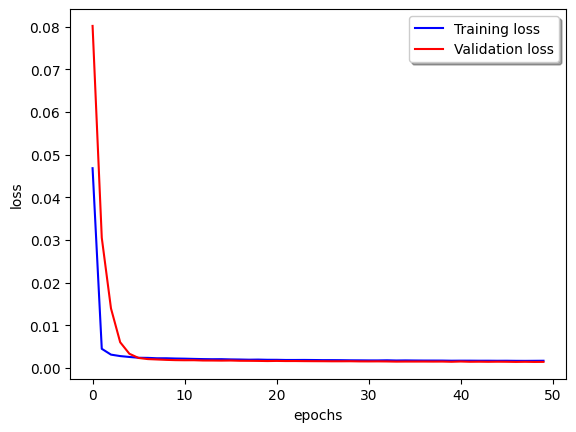

In [15]:
# Plot the classifier loss and accuracy curves for training and validation data
import matplotlib.pyplot as plt
plt.plot(Rhistoryc2.history['loss'], color='b', label="Training loss")
plt.plot(Rhistoryc2.history['val_loss'], color='r',label="Validation loss")
legend = plt.legend(loc='best', shadow=True)
plt.ylabel('loss')
plt.xlabel('epochs')

#Test the model by pre-seperated data

In [16]:
#read the test data and seperate test data
import csv
import pandas as pd
testattackdata=pd.read_csv('Dataset/SwipeDatatest.csv',index_col=0)
testattackdata = testattackdata[testattackdata['Label'] >= 68]
#testdataset.head()

In [17]:
#Random project the auxiliary dataset
import numpy as np
from sklearn.random_projection import SparseRandomProjection

column1=['RPF1', 'RPF2', 'RPF3', 'RPF4', 'RPF5', 'RPF6', 'RPF7', 'RPF8', 'RPF9', 'RPF10', 'RPF11', 'RPF12', 'RPF13', 'RPF14', 'RPF15', 'RPF16', 'RPF17', 'RPF18',
         'RPF19', 'RPF20', 'RPF21', 'RPF22', 'RPF23', 'RPF24', 'RPF25', 'RPF26', 'RPF27', 'RPF28', 'RPF29', 'RPF30','Label']
column2=column1=['RPF1', 'RPF2', 'RPF3', 'RPF4', 'RPF5', 'RPF6', 'RPF7', 'RPF8', 'RPF9', 'RPF10', 'RPF11', 'RPF12', 'RPF13', 'RPF14', 'RPF15', 'RPF16', 'RPF17', 'RPF18',
         'RPF19', 'RPF20', 'RPF21', 'RPF22', 'RPF23', 'RPF24', 'RPF25', 'RPF26', 'RPF27', 'RPF28', 'RPF29', 'RPF30']
testattackDataRP = pd.DataFrame(columns=column1)
for seed in range(68,86):
    rng = np.random.RandomState(seed)
    X = testattackdata[testattackdata['Label']==seed]
    transformer = SparseRandomProjection(n_components=30, random_state=rng)
    Xdata=X.drop(columns=['Label'])
    XRP = pd.DataFrame(transformer.fit_transform(Xdata),columns=column2)
    XRP['Label']=seed
    testattackDataRP = pd.concat([testattackDataRP, XRP], ignore_index=True)
    #print(auxilaryDataRP)
    #print("Shape of Actual data:",Xdata.shape)
    #print("Shape of Randome Matrix:", transformer.components_.shape[1],transformer.components_.shape[0])
    #print("Shape of Projected data:", X_new.shape)
print(testattackdata.shape)
print(testattackDataRP.shape)


(425, 34)
(425, 31)


C:\Users\mdmor\AppData\Local\Temp\ipykernel_27732\378522388.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  testattackDataRP = pd.concat([testattackDataRP, XRP], ignore_index=True)


In [18]:
testattackdata=testattackdata.drop(columns=['Label'])
testattackDataRP=testattackDataRP.drop(columns=['Label'])

In [19]:
#Performance of the trained attacker regressor
loss, accuracy = Regressor.evaluate(testattackDataRP, testattackdata)
#print('Test score:', score)
print('Loss:', loss)
print('Accuracy:', accuracy)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0437 - mean_squared_error: 0.0437 
Loss: 0.04291098192334175
Accuracy: 0.04291098192334175


# Let say attacker has the access of Random projected data of the original data profiles

In [20]:
#Let say attacker has the access of RP data of original data
import numpy as np
from sklearn.random_projection import SparseRandomProjection

column1=['RPF1', 'RPF2', 'RPF3', 'RPF4', 'RPF5', 'RPF6', 'RPF7', 'RPF8', 'RPF9', 'RPF10', 'RPF11', 'RPF12', 'RPF13', 'RPF14', 'RPF15', 'RPF16', 'RPF17', 'RPF18',
         'RPF19', 'RPF20', 'RPF21', 'RPF22', 'RPF23', 'RPF24', 'RPF25', 'RPF26', 'RPF27', 'RPF28', 'RPF29', 'RPF30','Label']
column2=column1=['RPF1', 'RPF2', 'RPF3', 'RPF4', 'RPF5', 'RPF6', 'RPF7', 'RPF8', 'RPF9', 'RPF10', 'RPF11', 'RPF12', 'RPF13', 'RPF14', 'RPF15', 'RPF16', 'RPF17', 'RPF18',
         'RPF19', 'RPF20', 'RPF21', 'RPF22', 'RPF23', 'RPF24', 'RPF25', 'RPF26', 'RPF27', 'RPF28', 'RPF29', 'RPF30']
trainingDataRP = pd.DataFrame(columns=column1)
for seed in range(0,68):
    rng = np.random.RandomState(seed)
    X = trainingData[trainingData['Label']==seed]
    transformer = SparseRandomProjection(n_components=30, random_state=rng)
    Xdata=X.drop(columns=['Label'])
    XRP = pd.DataFrame(transformer.fit_transform(Xdata),columns=column2)
    XRP['Label']=seed
    trainingDataRP = pd.concat([trainingDataRP, XRP], ignore_index=True)
    #print("Shape of Actual data:",Xdata.shape)
    #print("Shape of Randome Matrix:", transformer.components_.shape[1],transformer.components_.shape[0])
    #print("Shape of Projected data:", X_new.shape)
print(trainingData.shape)
print(trainingDataRP.shape)

C:\Users\mdmor\AppData\Local\Temp\ipykernel_27732\2605144147.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  trainingDataRP = pd.concat([trainingDataRP, XRP], ignore_index=True)


(20400, 34)
(20400, 31)


In [21]:
#user id in original projected data
print(trainingDataRP['Label'])

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
20395    67.0
20396    67.0
20397    67.0
20398    67.0
20399    67.0
Name: Label, Length: 20400, dtype: float64


In [22]:
#Prediction of plain data by the attacker mdoel assuming that attacker has access of projected data
tDataRP=trainingDataRP.drop(columns=['Label'])
tDataReg= Regressor.predict(tDataRP)
print(tDataReg.shape)

638/638 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(20400, 33)


In [23]:
#assume that along with project data attacker know the label of the data.
# Add id with recovered data
print(type(tDataReg))
print(type(trainingDataRP['Label'].to_numpy()))
traningdataReg = pd.concat([pd.DataFrame(tDataReg), trainingDataRP['Label'].to_frame()], axis=1)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [24]:
# recovered data by the attacker model from projected data
print(traningdataReg.shape)

(20400, 34)


# To test the qulity of recover data we did this experiment

In [25]:
traningdataReg.columns=list(trainingData.columns)
print(traningdataReg)

              1         2         3         4         5         6         7  \
0      0.032680  0.370753  0.476616  0.570317  0.566552  0.274710  0.076256   
1      0.029372  0.344024  0.457228  0.544581  0.550227  0.286820  0.092882   
2      0.035404  0.345655  0.415918  0.511967  0.533250  0.286831  0.094000   
3      0.035516  0.352978  0.437762  0.524220  0.558556  0.284170  0.082641   
4      0.030678  0.362171  0.456348  0.561425  0.559586  0.272875  0.077437   
...         ...       ...       ...       ...       ...       ...       ...   
20395  0.020455  0.485648  0.620453  0.654131  0.464135  0.097189  0.240331   
20396  0.019439  0.481310  0.632519  0.681990  0.476812  0.083126  0.249748   
20397  0.026972  0.517533  0.622974  0.678244  0.463813  0.102897  0.293118   
20398  0.029807  0.514943  0.622744  0.613524  0.459855  0.140712  0.276386   
20399  0.042534  0.540828  0.554335  0.497912  0.457573  0.164414  0.294056   

              8         9        10  ...        25 

In [26]:
import numpy as np
from scipy import stats
allPvalue=np.zeros((86,33))
for id in range(0,68):
    dataset1=traningdataReg[traningdataReg['Label']==id]
    dataset2=trainingData[trainingData['Label']==id]
    for col in range (0,33):
        sample1=dataset1.iloc[:,col]
        sample2=dataset2.iloc[:,col]
        statistics, allPvalue[id,col]=stats.kstest(sample1, sample2)

In [27]:
print(allPvalue)

[[2.51803856e-023 1.14206452e-151 3.74262317e-028 ... 4.22238366e-021
  1.86743629e-091 1.48029788e-179]
 [7.09312363e-137 2.36785122e-111 5.55983928e-144 ... 8.66702156e-068
  1.48029788e-179 1.48029788e-179]
 [1.63129640e-148 1.48029788e-179 5.90299077e-129 ... 5.30245661e-172
  3.46788500e-048 1.48029788e-179]
 ...
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]]


In [28]:
allPvalue = np.where(allPvalue < 0.05, 0, 1)
#allPvalue[allPvalue < 0.05] = 0
print(allPvalue)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
print(np.sum(allPvalue, axis=1))
print(len(allPvalue))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
86


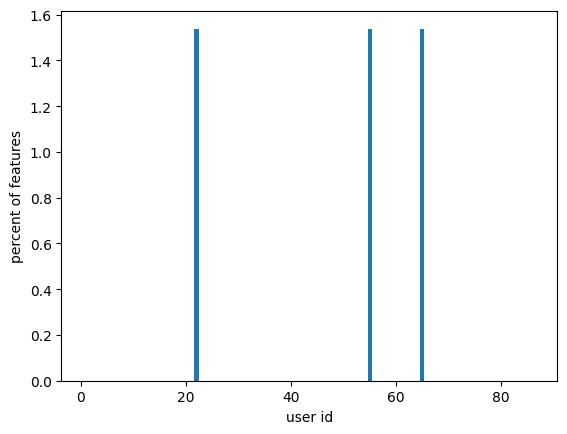

In [30]:
import matplotlib.pyplot as plt
data=np.sum(allPvalue, axis=1)*100/65
index=[i for i in range (1,len(data)+1)]
plt.bar(index, data)
plt.xlabel('user id')
plt.ylabel('percent of features')
#plt.title('Total features in a profile (out of 65 features) that passed the similarity test')
plt.show()

# End of program

In [98]:
#Random project the recover data to impersonate the user. Used different seed
import numpy as np
from sklearn.random_projection import SparseRandomProjection
#traningdataReg = pd.concat([tDataReg, trainingDataRP['ID']], axis=1)
column1=['RPF1','RPF2','RPF3','RPF4','RPF5','RPF6','RPF7','RPF8','RPF9','RPF10','RPF11','RPF12','RPF13','RPF14','RPF15',
         'RPF16','RPF17','RPF18','RPF19','RPF20','RPF21','RPF22','RPF23','RPF24','RPF25','RPF26','RPF27','RPF28','RPF29','RPF30',
         'RPF31','RPF32','RPF33','RPF34','RPF35','RPF36','RPF37','RPF38','RPF39','RPF40','RPF41','RPF42','RPF43','RPF44','RPF45',
         'RPF46','RPF47','RPF48','RPF49','RPF50','RPF51','RPF52','RPF53','RPF54','RPF55','RPF56','ID']
column2=column1=['RPF1','RPF2','RPF3','RPF4','RPF5','RPF6','RPF7','RPF8','RPF9','RPF10','RPF11','RPF12','RPF13','RPF14','RPF15',
         'RPF16','RPF17','RPF18','RPF19','RPF20','RPF21','RPF22','RPF23','RPF24','RPF25','RPF26','RPF27','RPF28','RPF29','RPF30',
         'RPF31','RPF32','RPF33','RPF34','RPF35','RPF36','RPF37','RPF38','RPF39','RPF40','RPF41','RPF42','RPF43','RPF44','RPF45',
         'RPF46','RPF47','RPF48','RPF49','RPF50','RPF51','RPF52','RPF53','RPF54','RPF55','RPF56']
traningdataReg.columns=dataset.columns
trainingDataRPReg = pd.DataFrame(columns=column1)
for seed in range(0,96):
    rng = np.random.RandomState(seed+10)
    X = traningdataReg[traningdataReg['ID']==seed]
    transformer = SparseRandomProjection(n_components=56, random_state=rng)
    Xdata=X.drop(columns=['ID'])
    XRP = pd.DataFrame(transformer.fit_transform(Xdata),columns=column2)
    XRP['ID']=seed
    trainingDataRPReg = pd.concat([trainingDataRPReg, XRP], ignore_index=True)
    #print("Shape of Actual data:",Xdata.shape)
    #print("Shape of Randome Matrix:", transformer.components_.shape[1],transformer.components_.shape[0])
    #print("Shape of Projected data:", X_new.shape)
print(traningdataReg.shape)
print(trainingDataRPReg.shape)

(97999, 66)
(97999, 57)


In [99]:
print("Total user in test dataset:", len(pd.unique(trainingDataRPReg['ID'])))

Total user in test dataset: 96


In [100]:
#Performance of the attacker by using the random projected recover data
#UserModel.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
Xtest=trainingDataRPReg.drop(columns=['ID'])
ytest=trainingDataRPReg['ID']
ytest=to_categorical(ytest)
loss, accuracy = TrainedClassifier.evaluate(Xtest,ytest)
#print('Test score:', score)
print('Loss:', loss)
print('Accuracy:', accuracy)

3063/3063 [==============================] - 4s 1ms/step - loss: 19.9066 - accuracy: 0.0000e+00
Loss: 19.906648635864258
Accuracy: 0.0


In [101]:
#Random project the recover data to impersonate the user. If the attacker know the key
import numpy as np
from sklearn.random_projection import SparseRandomProjection
#traningdataReg = pd.concat([tDataReg, trainingDataRP['ID']], axis=1)
column1=['RPF1','RPF2','RPF3','RPF4','RPF5','RPF6','RPF7','RPF8','RPF9','RPF10','RPF11','RPF12','RPF13','RPF14','RPF15',
         'RPF16','RPF17','RPF18','RPF19','RPF20','RPF21','RPF22','RPF23','RPF24','RPF25','RPF26','RPF27','RPF28','RPF29','RPF30',
         'RPF31','RPF32','RPF33','RPF34','RPF35','RPF36','RPF37','RPF38','RPF39','RPF40','RPF41','RPF42','RPF43','RPF44','RPF45',
         'RPF46','RPF47','RPF48','RPF49','RPF50','RPF51','RPF52','RPF53','RPF54','RPF55','RPF56','ID']
column2=column1=['RPF1','RPF2','RPF3','RPF4','RPF5','RPF6','RPF7','RPF8','RPF9','RPF10','RPF11','RPF12','RPF13','RPF14','RPF15',
         'RPF16','RPF17','RPF18','RPF19','RPF20','RPF21','RPF22','RPF23','RPF24','RPF25','RPF26','RPF27','RPF28','RPF29','RPF30',
         'RPF31','RPF32','RPF33','RPF34','RPF35','RPF36','RPF37','RPF38','RPF39','RPF40','RPF41','RPF42','RPF43','RPF44','RPF45',
         'RPF46','RPF47','RPF48','RPF49','RPF50','RPF51','RPF52','RPF53','RPF54','RPF55','RPF56']
traningdataReg.columns=dataset.columns
trainingDataRPReg = pd.DataFrame(columns=column1)
for seed in range(0,96):
    rng = np.random.RandomState(seed)
    X = traningdataReg[traningdataReg['ID']==seed]
    transformer = SparseRandomProjection(n_components=56, random_state=rng)
    Xdata=X.drop(columns=['ID'])
    XRP = pd.DataFrame(transformer.fit_transform(Xdata),columns=column2)
    XRP['ID']=seed
    trainingDataRPReg = pd.concat([trainingDataRPReg, XRP], ignore_index=True)
    #print("Shape of Actual data:",Xdata.shape)
    #print("Shape of Randome Matrix:", transformer.components_.shape[1],transformer.components_.shape[0])
    #print("Shape of Projected data:", X_new.shape)
print(traningdataReg.shape)
print(trainingDataRPReg.shape)

(97999, 66)
(97999, 57)


In [102]:
#Performance of the attacker by using the random projected recover data when key is known
#UserModel.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
Xtest=trainingDataRPReg.drop(columns=['ID'])
ytest=trainingDataRPReg['ID']
ytest=to_categorical(ytest)
loss, accuracy = TrainedClassifier.evaluate(Xtest,ytest)
#print('Test score:', score)
print('Loss:', loss)
print('Accuracy:', accuracy)

3063/3063 [==============================] - 4s 1ms/step - loss: 0.1201 - accuracy: 0.9698
Loss: 0.12010253220796585
Accuracy: 0.969836413860321
